In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [133]:
filename = "../data/all_data.json"

df = pd.read_json(filename, convert_dates=["release_date"])
df

,artist,album,release_date,userscore,metascore,link_album,link_img,genres,grammy,billboard
0,Sigur Rós,(),2002-10-29,88.0,82,https://www.metacritic.com/music/()/sigur-ros,https://static.metacritic.com/images/products/...,"[Indie, Rock]",None,None
1,Ed Sheeran,Divide,2017-03-03,47.0,62,https://www.metacritic.com/music/(divide)/ed-s...,https://static.metacritic.com/images/products/...,[Pop/Rock],None,"{'2017': 4, '2018': 5, '2019': 31, '2020': 65}"
2,Ed Sheeran,+,2012-06-12,76.0,67,https://www.metacritic.com/music/+/ed-sheeran,https://static.metacritic.com/images/products/...,[Pop/Rock],None,"{'2012': 136, '2013': 46, '2014': 122, '2015':..."
3,Jewel,0304,2003-06-03,63.0,63,https://www.metacritic.com/music/0304/jewel,https://static.metacritic.com/images/products/...,"[Pop, Adult Alternative, Singer-Songwriter]",None,{'2003': 110}
4,High Places,03/07-09/07,2008-07-22,77.0,81,https://www.metacritic.com/music/0307-0907/hig...,https://static.metacritic.com/images/products/...,[Electronic],None,None
...,...,...,...,...,...,...,...,...,...,...
3241,Joanna Newsom,Ys,2006-11-14,84.0,85,https://www.metacritic.com/music/ys/joanna-newsom,https://static.metacritic.com/images/products/...,"[Indie, Rock, Folk]",None,None
3242,Smashing Pumpkins,Zeitgeist,2007-07-10,77.0,59,https://www.metacritic.com/music/zeitgeist/the...,https://static.metacritic.com/images/products/...,"[Rock, Alternative]",None,{'2007': 165}
3243,Tal National,Zoy Zoy,2015-04-13,NaN,82,https://www.metacritic.com/music/zoy-zoy/tal-n...,https://static.metacritic.com/images/products/...,"[Pop/Rock, International, West African, Africa...",None,None
3244,Denzel Curry,ZUU,2019-05-31,80.0,85,https://www.metacritic.com/music/zuu/denzel-curry,https://static.metacritic.com/images/products/...,[Rap],None,None


# Total x Billboard x Grammy

In [134]:
df_billboard = df[df["billboard"].notnull()]
df_grammy = df[df["grammy"].notnull()]

_grammy_winners = df_grammy["grammy"].apply(lambda d: d["won"])
_billboard_top_1 = df_billboard["billboard"].apply(lambda d: [v for v in d.values()])

print("Total:", len(df))
print("Billboard:", len(df_billboard))
print("Billboard Top 1:", len([... for b in _billboard_top_1.to_list() if 1 in b]))
print("Grammy:", len(df_grammy))
print("Grammy winners:", len([... for g in _grammy_winners.to_list() if g == 1]))

Total: 3246
Billboard: 1296
Billboard Top 1: 15
Grammy: 97
Grammy winners: 17


# Plot data time distribution

<AxesSubplot:title={'center':'Grammy'}, xlabel='release_date'>

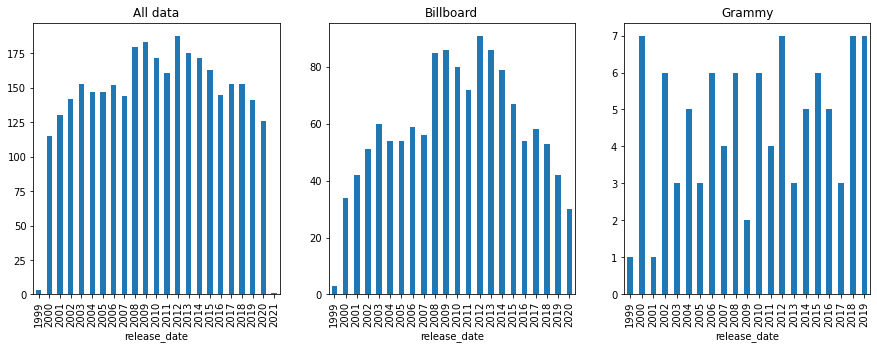

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(5)
fig.set_figwidth(15)

_df_year = df.groupby([df["release_date"].dt.year]).size()
_df_year.plot.bar(ax=axes[0], title="All data")

_df_year = df_billboard.groupby([df_billboard["release_date"].dt.year]).size()
_df_year.plot.bar(ax=axes[1], title="Billboard")

_df_year = df_grammy.groupby([df_grammy["release_date"].dt.year]).size()
_df_year.plot.bar(ax=axes[2], title="Grammy")

The ideal would be to get 200 in Billboard, but an average of 50 is ok.

Grammy is harder to estimate, because some albums are released in one year, but runs for the award in the next year.
But 5 albums per year would be the ideal (2018 forwards the award started to nominate more than 5 albums).

# Billboard position distribution

<AxesSubplot:xlabel='pos', ylabel='Count'>

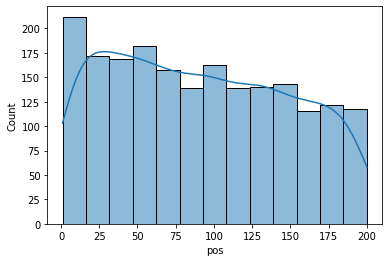

In [136]:
_billboard_positions = df_billboard["billboard"].apply(lambda d: [v for v in d.values()])
all_pos = []
for b in _billboard_positions.values:
    for v in b:
        all_pos.append(v)

_pos_df = pd.DataFrame([{"pos": a} for a in all_pos])
# _pos_df.plot.bar(xticks=[0, 25, 50, 75, 100, 125, 150, 175, 200], yticks=[0, 5, 10, 15, 20])

sns.histplot(_pos_df, x="pos", fill=True, element="bars", kde=True)
# _pos_df

We can see that the number of album drops for the bottom of the list, which is expected

# IDEAS FOR PLOTS

- Genres distribution in Grammy/Billboard/All data (histplot)
- Metascore by position for Billboard (average)
- Metascore by year for Billboard (average), (maybe only top 10)
- Metascore for grammy albums (already done, just copy)
- Metascore by genre (boxplot)